## Import python dependencies

In [1]:
from model import *
from data import *

import azureml.core
from azureml.core import Workspace

# check core SDK version number
print("Azure ML SDK Version: ", azureml.core.VERSION)

Using TensorFlow backend.
/anaconda/envs/py36/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


Azure ML SDK Version:  1.0.39


## Connect to workspace

In [2]:
# load workspace configuration from the config.json file in the current folder.
ws = Workspace.from_config()
print(ws.name, ws.location, ws.resource_group, ws.location, sep='\t')

first_workspace	westus2	azure_challenge	westus2


## Create experiment

In [3]:
experiment_name = 'unet-membrane'

from azureml.core import Experiment
exp = Experiment(workspace=ws, name=experiment_name)

## Create / attach remote compute

Creation of compute takes approximately 5 minutes. If the AmlCompute with that name is already in your workspace the code will skip the creation process.

In [4]:
from azureml.core.compute import AmlCompute
from azureml.core.compute import ComputeTarget
import os

# choose a name for your cluster
compute_name = os.environ.get("AML_COMPUTE_CLUSTER_NAME", "cpucluster")
compute_min_nodes = os.environ.get("AML_COMPUTE_CLUSTER_MIN_NODES", 0)
compute_max_nodes = os.environ.get("AML_COMPUTE_CLUSTER_MAX_NODES", 4)

# This example uses CPU VM. For using GPU VM, set SKU to STANDARD_NC6
vm_size = os.environ.get("AML_COMPUTE_CLUSTER_SKU", "STANDARD_D2_V2")


if compute_name in ws.compute_targets:
    compute_target = ws.compute_targets[compute_name]
    if compute_target and type(compute_target) is AmlCompute:
        print('found compute target. just use it. ' + compute_name)
else:
    print('creating a new compute target...')
    provisioning_config = AmlCompute.provisioning_configuration(vm_size = vm_size,
                                                                min_nodes = compute_min_nodes, 
                                                                max_nodes = compute_max_nodes)

    # create the cluster
    compute_target = ComputeTarget.create(ws, compute_name, provisioning_config)
    
    # can poll for a minimum number of nodes and for a specific timeout. 
    # if no min node count is provided it will use the scale settings for the cluster
    compute_target.wait_for_completion(show_output=True, min_node_count=None, timeout_in_minutes=20)
    
     # For a more detailed view of current AmlCompute status, use get_status()
    print(compute_target.get_status().serialize())

found compute target. just use it. cpucluster


## Visualize data

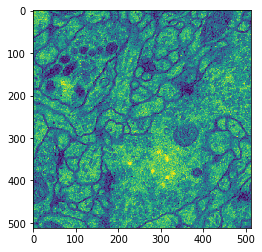

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = mpimg.imread(os.getcwd()+"/data/membrane/test/1.png")
imgplot = plt.imshow(img)

## Upload data to the cloud

In [11]:
ds = ws.get_default_datastore()
print(ds.datastore_type, ds.account_name, ds.container_name)

data_folder = os.path.join(os.getcwd(), 'data')

ds.upload(src_dir=data_folder, target_path='membrane', overwrite=True, show_progress=True)

AzureBlob firstworkspace2016119125 azureml-blobstore-3011c272-17b9-4a3c-8ca0-f3b84157ba53
Uploading /mnt/azmnt/code/Users/unet_on_azure/unet/data/image_arr.npy
Uploading /mnt/azmnt/code/Users/unet_on_azure/unet/data/mask_arr.npy
Uploading /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/test/0.png
Uploading /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/test/0_new_predict.png
Uploading /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/test/0_predict.png
Uploading /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/test/1.png
Uploading /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/test/10.png
Uploading /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/test/10_new_predict.png
Uploading /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/test/10_predict.png
Uploading /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/test/11.png
Uploading /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/test/11_new_predict.png
Uploading /mnt/azmnt/code/User

Uploaded /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/test/18.png, 42 files out of an estimated total of 272
Uploading /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/test/3_predict.png
Uploaded /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/test/25.png, 43 files out of an estimated total of 272
Uploading /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/test/4.png
Uploaded /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/test/12.png, 44 files out of an estimated total of 272
Uploading /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/test/4_new_predict.png
Uploaded /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/test/13_predict.png, 45 files out of an estimated total of 272
Uploading /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/test/4_predict.png
Uploaded /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/test/24.png, 46 files out of an estimated total of 272
Uploading /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/

Uploaded /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/train/aug/image_16_2807358.png, 94 files out of an estimated total of 272
Uploading /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/train/aug/image_24_4273200.png
Uploading /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/train/aug/image_24_6858616.png
Uploaded /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/train/aug/image_15_7159703.png, 95 files out of an estimated total of 272
Uploading /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/train/aug/image_25_124914.png
Uploaded /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/test/7.png, 96 files out of an estimated total of 272
Uploaded /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/test/8.png, 97 files out of an estimated total of 272
Uploaded /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/train/aug/image_16_5553526.png, 98 files out of an estimated total of 272
Uploading /mnt/azmnt/code/Users/unet_on_azure/unet/data/membran

Uploaded /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/train/aug/mask_1_3080959.png, 163 files out of an estimated total of 272
Uploading /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/train/aug/mask_29_7125951.png
Uploaded /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/train/aug/mask_19_3484329.png, 164 files out of an estimated total of 272
Uploading /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/train/aug/mask_29_8786524.png
Uploaded /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/train/aug/mask_20_1585978.png, 165 files out of an estimated total of 272
Uploaded /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/train/aug/mask_14_4412252.png, 166 files out of an estimated total of 272
Uploading /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/train/aug/mask_2_5692672.png
Uploaded /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/train/aug/mask_20_7169350.png, 167 files out of an estimated total of 272
Uploading /mnt/azmnt/code/U

Uploaded /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/train/image/1.png, 209 files out of an estimated total of 272
Uploading /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/train/image/8.png
Uploaded /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/train/aug/mask_7_5484409.png, 210 files out of an estimated total of 272
Uploading /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/train/image/9.png
Uploaded /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/train/aug/mask_9_5969630.png, 211 files out of an estimated total of 272
Uploading /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/train/label/0.png
Uploaded /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/train/image/2.png, 212 files out of an estimated total of 272
Uploaded /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/train/image/11.png, 213 files out of an estimated total of 272
Uploading /mnt/azmnt/code/Users/unet_on_azure/unet/data/membrane/train/label/1.png
Uploading /mnt/

Uploaded /mnt/azmnt/code/Users/unet_on_azure/unet/data/mask_arr.npy, 271 files out of an estimated total of 272
Uploaded /mnt/azmnt/code/Users/unet_on_azure/unet/data/image_arr.npy, 272 files out of an estimated total of 272


$AZUREML_DATAREFERENCE_80098e7b52c346428f761f78f28444a3

## Train your Unet with membrane data on Microsoft Azure ML
membrane data is in folder membrane/, it is a binary classification task.

The input shape of image and mask are the same :(batch_size,rows,cols,channel = 1)

### Train with data generator

In [7]:
#create directory for model and data file
script_folder = os.path.join(os.getcwd(), "unet-membrane")
os.makedirs(script_folder, exist_ok=True)

import shutil
shutil.copy('data.py', script_folder)
shutil.copy('model.py', script_folder)

'/mnt/azmnt/code/Users/unet_on_azure/unet/unet-membrane/model.py'

In [9]:
%%writefile $script_folder/train.py

from model import *
from data import *
import os
from azureml.core import Run


# note file saved in the outputs folder is automatically uploaded into experiment record
os.makedirs('outputs', exist_ok=True)

# get hold of the current run
run = Run.get_context()

#let user feed in 2 parameters, the location of the data files (from datastore), and the regularization rate of the logistic regression model
parser = argparse.ArgumentParser()
parser.add_argument('--data-folder', type=str, dest='data_folder', help='data folder mounting point')
args = parser.parse_args()

data_folder = args.data_folder

data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2, os.path.join(data_folder, 'membrane/train'),'image','label',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('outputs/unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
history = model.fit_generator(myGene,steps_per_epoch=10,epochs=10,callbacks=[model_checkpoint])

loss = history.history['loss']
run.log_list('loss', loss, description='Unet loss on membrane dataset')

Overwriting /mnt/azmnt/code/Users/unet_on_azure/unet/unet-membrane/train.py


### Train with npy file

## THIS MAY NOT BE WORKING SO USE WITH CAUTION

In [144]:
%%writefile $script_folder/train.py

from model import *
from data import *
import os
import argparse
from azureml.core import Run


# note file saved in the outputs folder is automatically uploaded into experiment record
os.makedirs('outputs', exist_ok=True)

# get hold of the current run
run = Run.get_context()

#let user feed in 2 parameters, the location of the data files (from datastore), and the regularization rate of the logistic regression model
parser = argparse.ArgumentParser()
parser.add_argument('--data-folder', type=str, dest='data_folder', help='data folder mounting point')
args = parser.parse_args()

data_folder = args.data_folder

model = unet()
model_checkpoint = ModelCheckpoint('outputs/unet_membrane.hdf5', monitor='val_loss',verbose=1, save_best_only=True)
#imgs_train,imgs_mask_train = geneTrainNpy(".../data/membrane/train/aug/",".../data/membrane/train/aug/")
imgs_train = np.load(os.path.join(data_folder, 'image_arr.npy'))
imgs_mask_train = np.load(os.path.join(data_folder, 'mask_arr.npy'))
history = model.fit(imgs_train, imgs_mask_train, batch_size=2, nb_epoch=100, verbose=1,validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])

run.log_list('loss', history.history['loss'], description='Unet loss on membrane dataset')
run.log_list('val_loss', history.history['val_loss'], description='Unet loss on membrane validation test')
run.log_list('acc', history.history['acc'], description='Unet accuracy on membrane dataset')
run.log_list('val_acc', history.history['val_acc'], description='Unet accuracy on validation test')

Overwriting /mnt/azmnt/code/Users/live.com#equim20/unet/unet-membrane/train.py


## Create an estimator  and run training

The estimator is used to submit the run. Submit the job to the compute cluster.

In [12]:
from azureml.train.dnn import TensorFlow

script_params = {
    '--data-folder': ds.path('membrane').as_mount(),
}

est = TensorFlow(source_directory=script_folder,
                script_params=script_params,
                compute_target=compute_target,
                entry_script='train.py',
                conda_packages=['keras', 'scikit-image'])

run = exp.submit(config=est)
run

framework_version is not specified, defaulting to version 1.13.


Experiment,Id,Type,Status,Details Page,Docs Page
unet-membrane,unet-membrane_1558724862_31139e4c,azureml.scriptrun,Queued,Link to Azure Portal,Link to Documentation


In [13]:
from azureml.widgets import RunDetails
RunDetails(run).show()

_UserRunWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO', '…

## Register that model

In [ ]:
model = run.register_model(model_name='unet_membrane', model_path='outputs/unet_membrane.hdf5')
print(model.name, model.id, model.version, sep='\t')

### Test your model and save predicted results

In [14]:
from azureml.core.model import Model
ws = Workspace.from_config()
model = Model(ws, 'unet_membrane')
model.download(target_dir=os.getcwd(), exist_ok=True)

'/mnt/azmnt/code/Users/unet_on_azure/unet/unet_membrane.hdf5'

In [15]:
from keras.models import load_model
net = unet()
net.load_weights(os.path.join(os.getcwd(),'unet_membrane.hdf5'))

testGene = testGenerator("data/membrane/test")

results = net.predict_generator(testGene,30)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/mnt/azmnt/code/Users/unet_on_azure/unet/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


In [16]:
# Save the results of the test to the test folder
print(results)
#for layer in net.layers: 
#    print(layer.get_config(), layer.get_weights())

#saveResult("data/membrane/test",results)

[[[[0.52444184]
   [0.52444184]
   [0.52444184]
   ...
   [0.52444184]
   [0.52444184]
   [0.52444184]]

  [[0.52444184]
   [0.52444184]
   [0.52444184]
   ...
   [0.52444184]
   [0.52444184]
   [0.52444184]]

  [[0.52444184]
   [0.52444184]
   [0.52444184]
   ...
   [0.52444184]
   [0.52444184]
   [0.52444184]]

  ...

  [[0.52444184]
   [0.52444184]
   [0.52444184]
   ...
   [0.52444184]
   [0.52444184]
   [0.52444184]]

  [[0.52444184]
   [0.52444184]
   [0.52444184]
   ...
   [0.52444184]
   [0.52444184]
   [0.52444184]]

  [[0.52444184]
   [0.52444184]
   [0.52444184]
   ...
   [0.52444184]
   [0.5195999 ]
   [0.52444184]]]


 [[[0.52444184]
   [0.52444184]
   [0.52444184]
   ...
   [0.52444184]
   [0.52444184]
   [0.52444184]]

  [[0.52444184]
   [0.52444184]
   [0.52444184]
   ...
   [0.52444184]
   [0.52444184]
   [0.52444184]]

  [[0.52444184]
   [0.52444184]
   [0.52444184]
   ...
   [0.52444184]
   [0.52444184]
   [0.52444184]]

  ...

  [[0.52444184]
   [0.52444184]
   [0.5

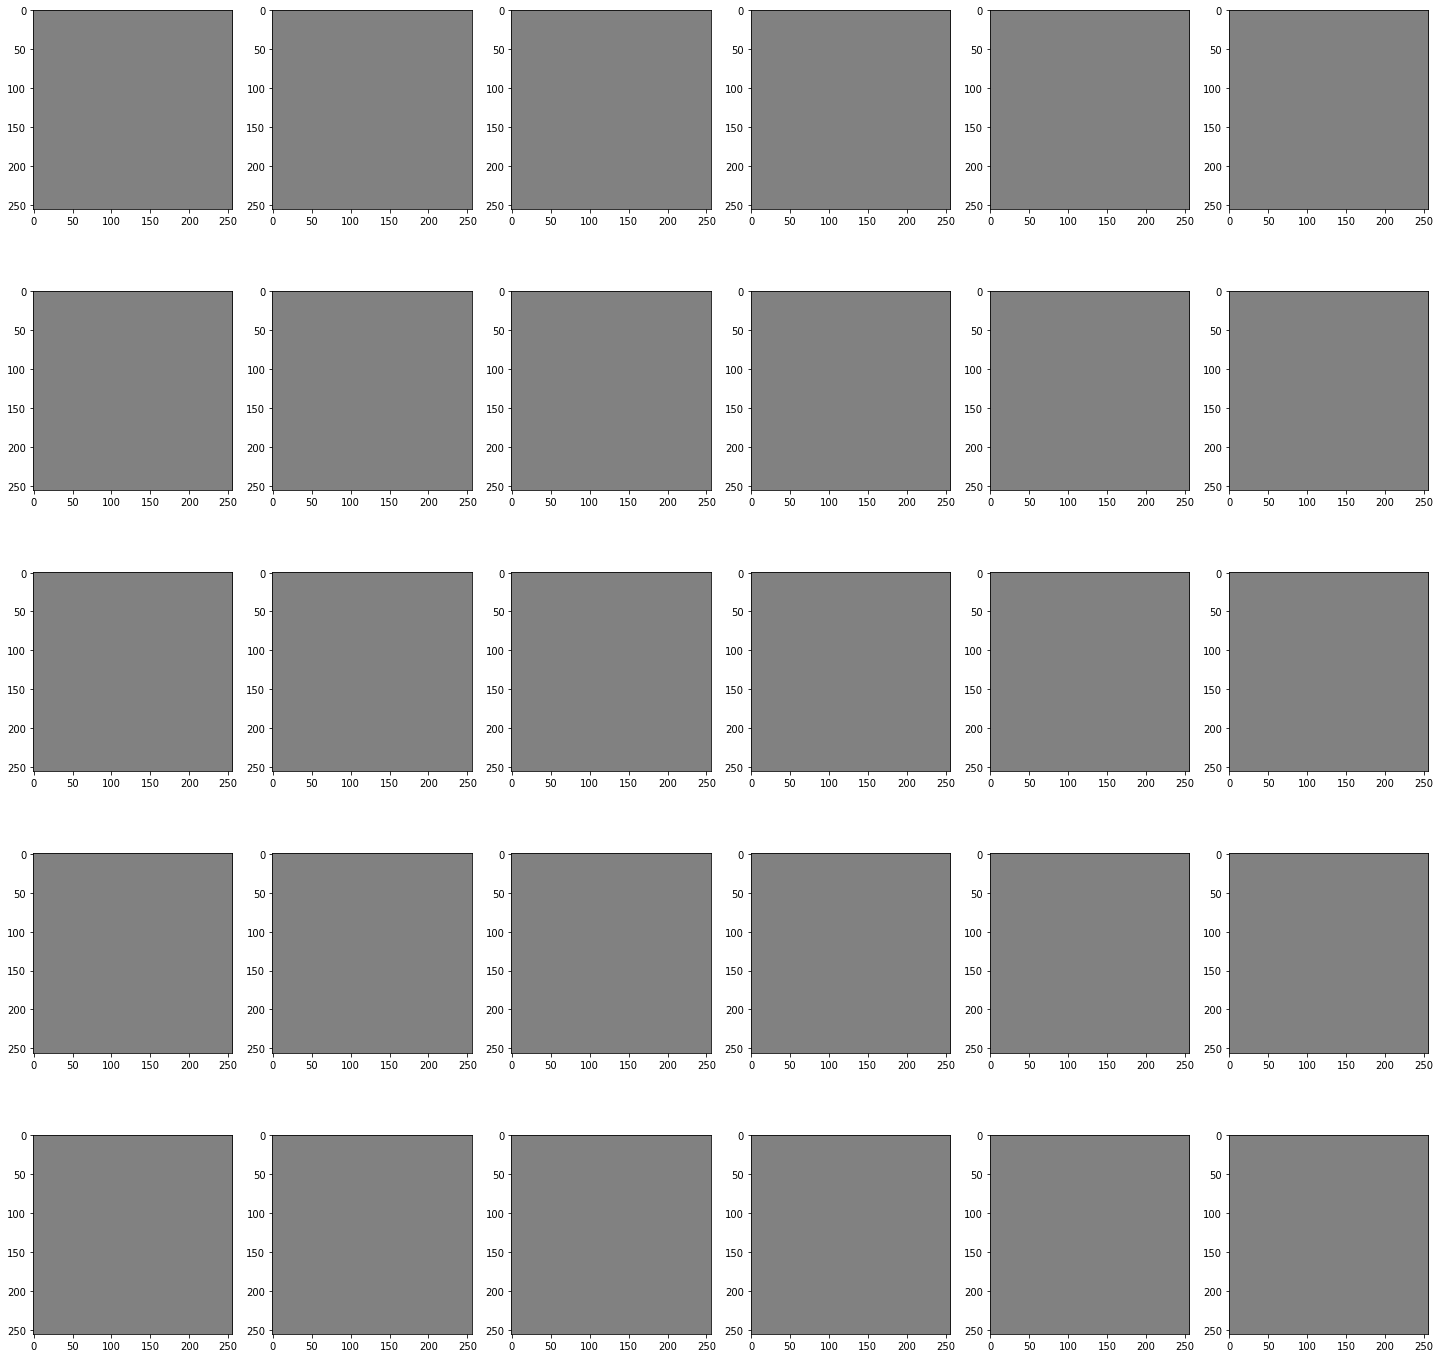

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

#view the results of the test
fig=plt.figure(figsize=(25, 25))
img = mpimg.imread(os.path.join(os.getcwd(),"data/membrane/test/1_new_predict.png"))
for i in range(results.shape[0]):
#     img = results[i].squeeze()
#     for w in range(len(img)):
#         for h in range(len(img[1])):
#             if img[w,h] > 0.5:
#                 img[w,h] = 0
#             else:
#                 img[w,h] = 1
                
    fig.add_subplot(5, 6, i+1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=1)
    
    
plt.show()